## Importing Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy
import matplotlib.colors as mcolors
import seaborn as sb


## Reading Data

In [4]:
df = pd.read_csv("Global_Earthquake_Data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283132 entries, 0 to 283131
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             283132 non-null  object 
 1   latitude         283132 non-null  float64
 2   longitude        283132 non-null  float64
 3   depth            282540 non-null  float64
 4   mag              283132 non-null  float64
 5   magType          283131 non-null  object 
 6   nst              94296 non-null   float64
 7   gap              144360 non-null  float64
 8   dmin             71103 non-null   float64
 9   rms              234815 non-null  float64
 10  net              283132 non-null  object 
 11  id               283132 non-null  object 
 12  updated          283132 non-null  object 
 13  place            282285 non-null  object 
 14  type             283132 non-null  object 
 15  horizontalError  64013 non-null   float64
 16  depthError       146269 non-null  floa

In [6]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,283132.000000,283132.000000,282540.000000,283132.000000,94296.000000,144360.000000,71103.000000,234815.000000,64013.000000,146269.000000,84886.000000,198002.000000
mean,4.381654,41.885638,69.795117,4.941265,82.707856,94.920725,4.518542,0.945888,8.403049,10.856471,0.137394,32.212872
std,29.459783,120.757518,115.794205,0.486020,96.171475,48.008934,5.793901,0.330535,4.902638,965.064825,0.112922,53.060711
min,-84.133000,-179.999700,-4.000000,3.380000,0.000000,6.500000,0.000000,-1.000000,0.014000,-1.000000,0.000000,0.000000
25%,-17.426025,-71.499000,10.000000,4.600000,25.000000,59.000000,1.308000,0.790000,6.200000,2.000000,0.068000,6.000000
50%,0.791000,99.178000,33.000000,4.800000,47.000000,89.000000,2.668000,0.940000,8.000000,5.700000,0.102000,15.000000
75%,29.909250,142.308000,60.792500,5.100000,100.000000,123.300000,5.243500,1.100000,10.170000,9.800000,0.173000,35.000000
max,87.386000,180.000000,700.900000,9.500000,934.000000,360.000000,62.626000,69.320000,99.000000,367558.100000,1.840000,941.000000


### Check NA values

In [7]:
df.isna().sum()

time                    0
latitude                0
longitude               0
depth                 592
mag                     0
magType                 1
nst                188836
gap                138772
dmin               212029
rms                 48317
net                     0
id                      0
updated                 0
place                 847
type                    0
horizontalError    219119
depthError         136863
magError           198246
magNst              85130
status                  0
locationSource          0
magSource               0
dtype: int64

In [8]:
df = df.dropna(subset=['mag', 'depth'])

### Imputation

In [9]:
# Remove rows with missing values in the 'depth' column
df = df.dropna(subset=['depth'])

# Replace missing values in 'magType' with the most common value
most_common_magType = df['magType'].mode()[0]
df['magType'].fillna(most_common_magType, inplace=True)

# Replace missing values in 'nst' with 0
df['nst'].fillna(0, inplace=True)

# Replace missing values in 'gap' with the median value
median_gap = df['gap'].median()
df['gap'].fillna(median_gap, inplace=True)

# Replace missing values in 'dmin' with the mean value
mean_dmin = df['dmin'].mean()
df['dmin'].fillna(mean_dmin, inplace=True)

# Replace missing values in 'rms' with the median value
median_rms = df['rms'].median()
df['rms'].fillna(median_rms, inplace=True)


# Replace missing values in 'rms' with the median value
median_horizontalError = df['horizontalError'].median()
df['horizontalError'].fillna(median_horizontalError, inplace=True)

# Replace missing values in 'rms' with the median value
median_depthError = df['depthError'].median()
df['depthError'].fillna(median_depthError, inplace=True)

# Replace missing values in 'rms' with the median value
median_magError = df['magError'].median()
df['magError'].fillna(median_magError, inplace=True)

# Replace missing values in 'rms' with the median value
median_magNst = df['magNst'].median()
df['magNst'].fillna(median_magNst, inplace=True)



# Replace missing values in 'place' with 'Unknown'
df['place'].fillna('Unknown', inplace=True)

### We have not Imputer the Error Features as they are More than 30% and Imputing those will Skew or diviate our data.

In [10]:
df.isna().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

# EDA and Visualizations

### For analysis lets filter some columns

In [11]:
df2 = df[['time', 'latitude', 'longitude', 'mag']]
df2.head()

,time,latitude,longitude,mag
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,5.0
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,4.8
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,4.9
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,4.6
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,4.5


#### Viewing datatypes

In [12]:
df2.dtypes

time          object
latitude     float64
longitude    float64
mag          float64
dtype: object

#### Converting object to datetime

In [13]:
df2['time'] = pd.to_datetime(df2['time'])

#### Data Description

In [14]:
df2.describe()

,latitude,longitude,mag
count,282540.000000,282540.000000,282540.000000
mean,4.308205,42.220426,4.941168
std,29.445632,120.652838,0.485930
min,-84.133000,-179.999700,3.380000
25%,-17.455000,-71.355050,4.600000
50%,0.690000,99.470100,4.800000
75%,29.718250,142.326000,5.100000
max,87.386000,180.000000,9.500000


### The average earthquake magnitude for the time period was 4.94, and the average depth was 69.79 kilometres. Notably, the strongest earthquake with a recorded magnitude during this time was 9.5. Let's look more closely at this important event's qualities to better comprehend it and its significance.

In [15]:
max_index = df2['mag'].idxmax() # Creating a variable of the max magnitude 
max_data = df2.loc[max_index, :] # storing the row of the largest earthquake
max_data

time         1960-05-22 19:11:20+00:00
latitude                       -38.143
longitude                      -73.407
mag                                9.5
Name: 272373, dtype: object

### The strongest earthquake that occurred during the time period under consideration had a magnitude of 9.5 and occurred on May 22, 1960, at a depth of 25 kilometres. Let's create a graphic that shows the earthquake's epicentre on the Earth's surface to obtain further understanding of its position and size.


## Bar plot of Disaster types
We can see that Earthquake is most common form of Natural Disaster.


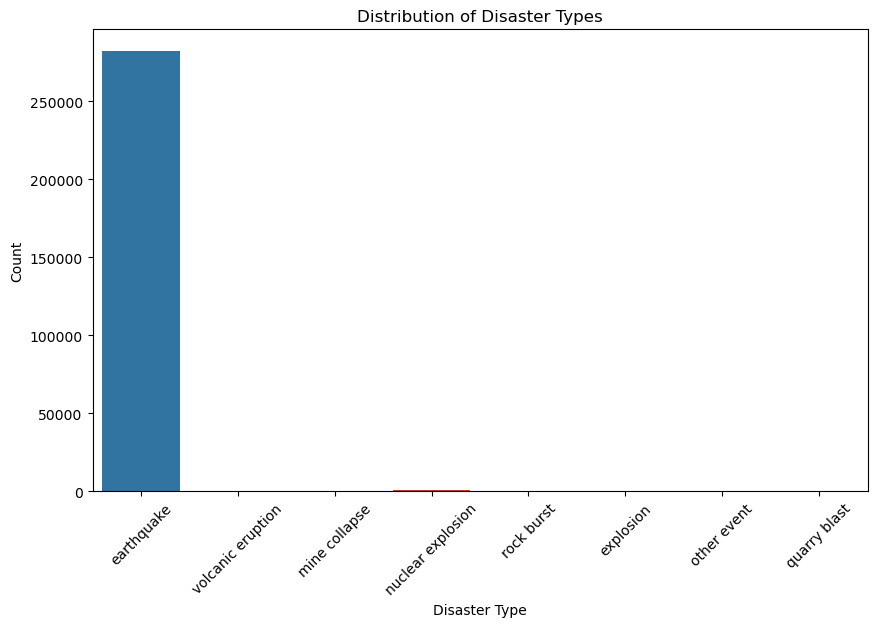

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.title('Distribution of Disaster Types')
plt.xticks(rotation=45)
plt.show()

### Line plot of earthquake frequency over time
We can see that the Frequency of Earthquakes increases over time.

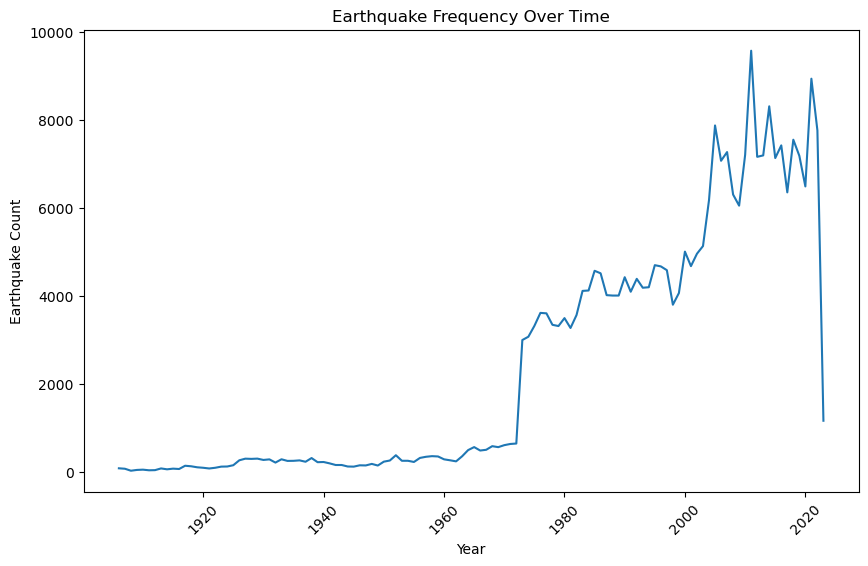

In [17]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
earthquake_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(earthquake_counts.index, earthquake_counts.values)
plt.xlabel('Year')
plt.ylabel('Earthquake Count')
plt.title('Earthquake Frequency Over Time')
plt.xticks(rotation=45)
plt.show()

### Bar plot of earthquake status

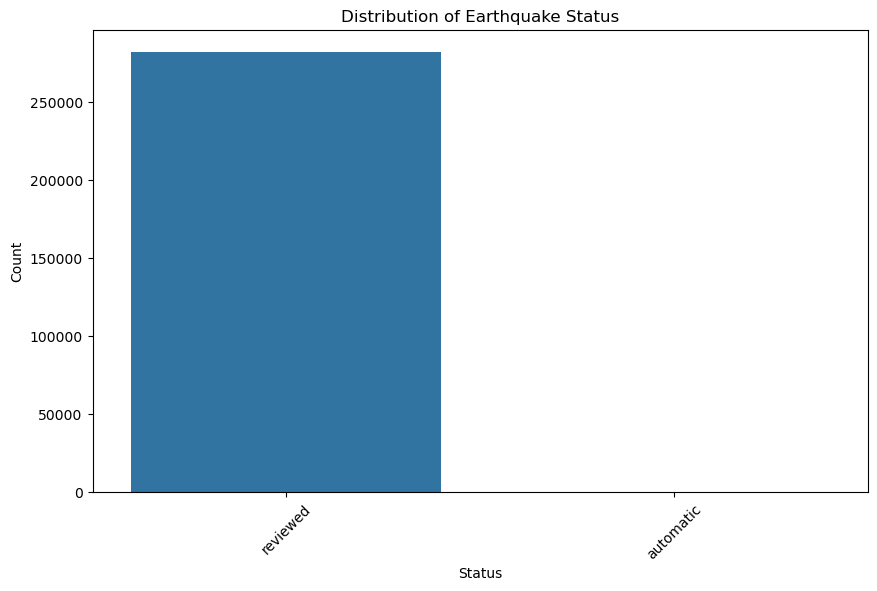

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Earthquake Status')
plt.xticks(rotation=45)
plt.show()

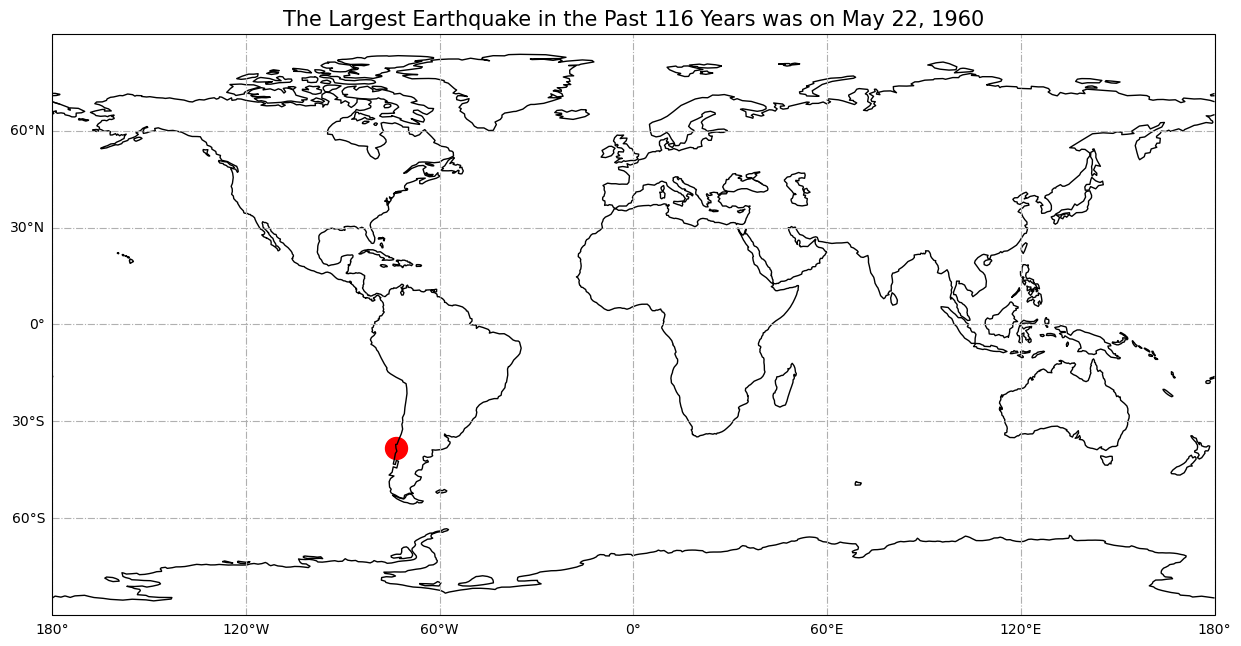

In [19]:
plt.figure(figsize=(15, 15)) # creating a figure with size being 20 by 20

ax = plt.axes(projection=ccrs.PlateCarree()) # Projecting PlateCarree from the cartopy library

ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) # Showing entire globe in PlateCarree format

gl = ax.gridlines(linestyle='-.', draw_labels=True) # adding gridlines to the plot
gl.top_labels = False # removing the top label
gl.right_labels = False # removing the right label

ax.coastlines() # adding coastlines to the plot

p = ax.scatter(x=max_data['longitude'], y=max_data['latitude'], s=250, c='r') # Plotting the max magnitude data point

plt.title('The Largest Earthquake in the Past 116 Years was on May 22, 1960', fontsize=15)

plt.show()

### Examining All Earthquakes

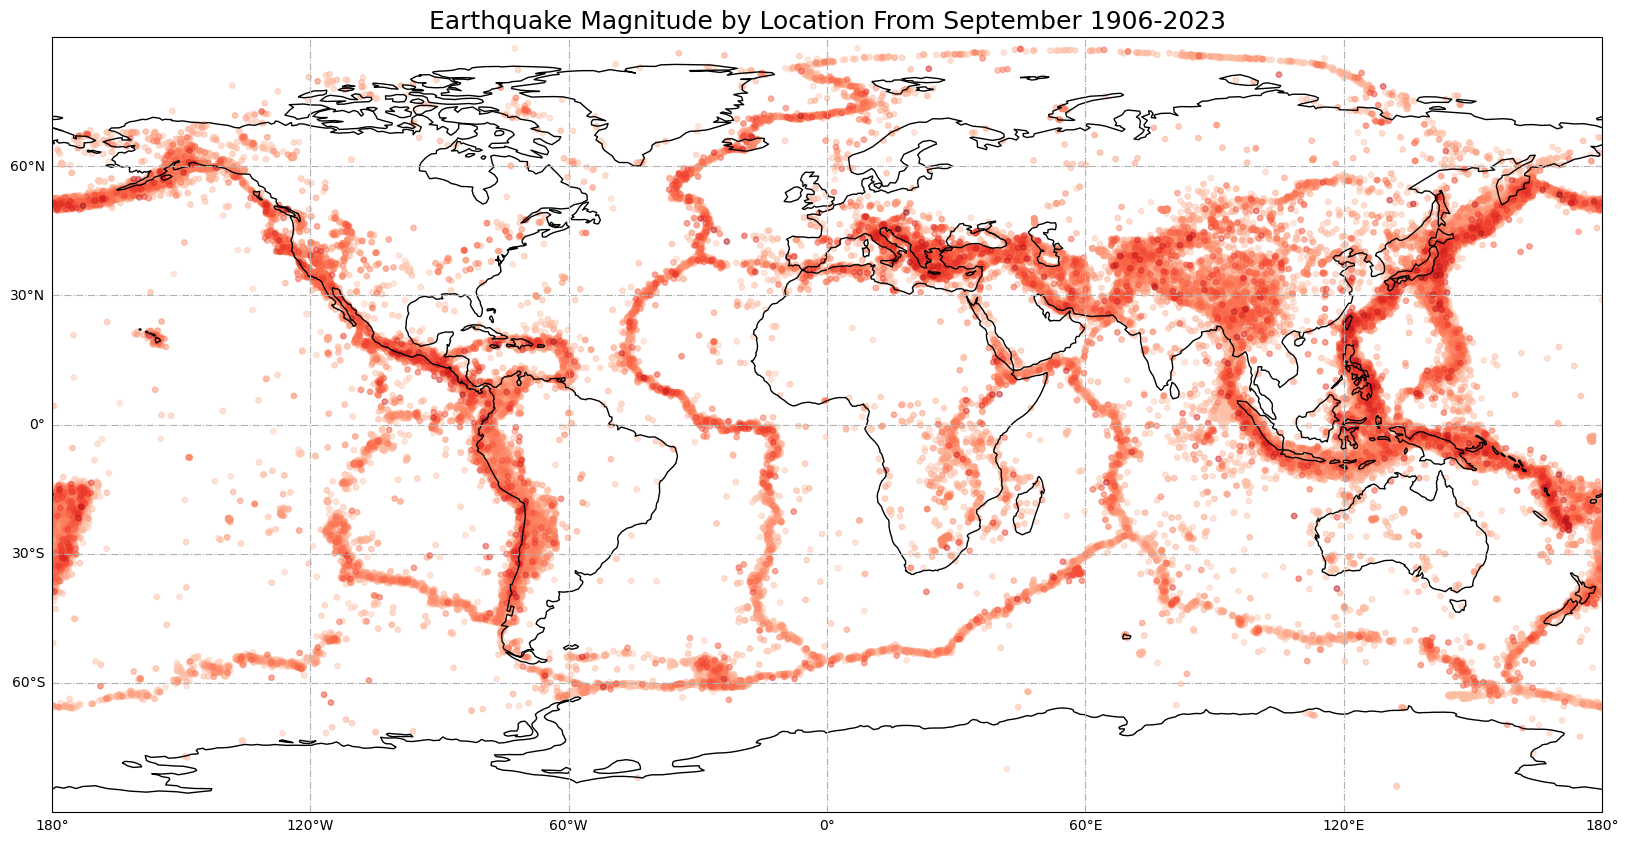

In [20]:

plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=df2['longitude'], y=df2['latitude'], c =df2['mag'].sort_values(), cmap='Reds', alpha=0.5, s=15)
plt.title('Earthquake Magnitude by Location From September 1906-2023', fontsize=18)


plt.ylabel('Magnitude', fontsize=16)

plt.show()

### The locations of all earthquakes are shown on the figure above, with varying shades of red denoting each earthquake's magnitude. Stronger earthquakes are represented by redder hues. The figure clearly shows where the plate borders are, which is where most earthquakes tend to happen.


### Let's look at the locations of all earthquakes with a magnitude of 8 or above to have a better understanding of the most severe earthquakes in the last 116 years.

In [21]:
strong_earthequakes = df2[df2['mag']>=8] # create an new Dataframe with earthquakes of 8 or greater
strong_earthequakes.shape[0] # looking at the amount of elements in the new DF

(97, 4)

### These results illustrate a total of 97 significant earthquakes that meet our criteria of a magnitude of 8 or higher.

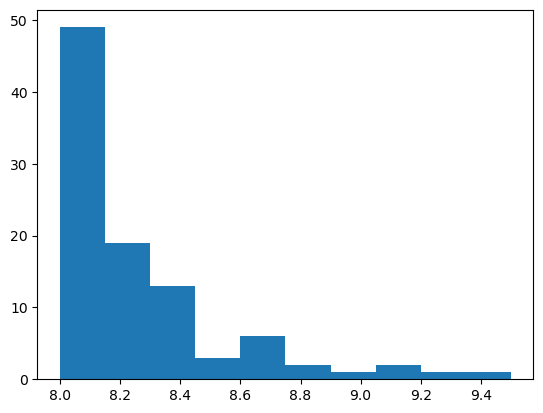

In [22]:
# Lets take a quick look at a histogram of the strong data magnitude
plt.hist(strong_earthequakes['mag'])

plt.show()

### This discovery is particularly noteworthy because there are relatively few earthquakes measuring 8.6 or higher, and it appears to follow an exponential distribution. Let's create a plot that shows the locations of these occurrences so we may examine this pattern in more detail.


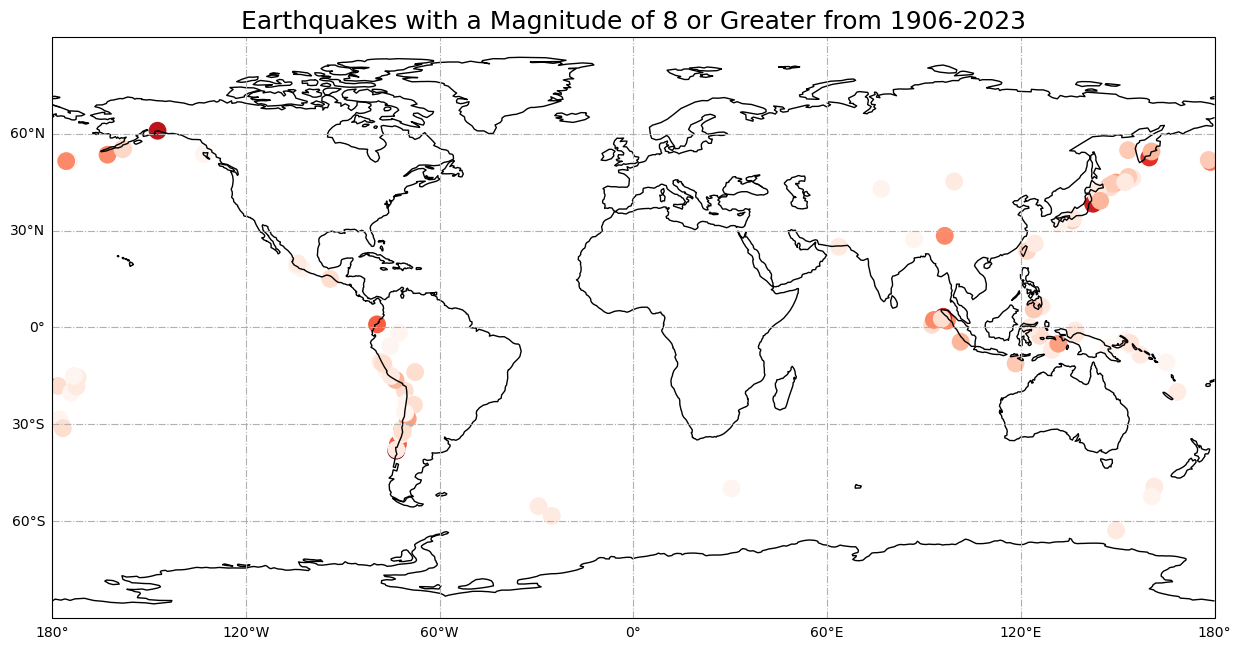

In [23]:

plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) # Zooming in on the graph

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=strong_earthequakes['longitude'], y=strong_earthequakes['latitude'], c =strong_earthequakes['mag'], cmap='Reds', s=140)
plt.title('Earthquakes with a Magnitude of 8 or Greater from 1906-2023', fontsize=18)


plt.show()



### According to the data, seismic activity is most intense close to tectonic plate borders. It's interesting to note that the dataset's strongest earthquakes were found to occur around Indonesia, Japan, and the western coast of South America. Notably, it is a significant finding that the majority of these strongest earthquakes occurred at convergent plate boundaries.

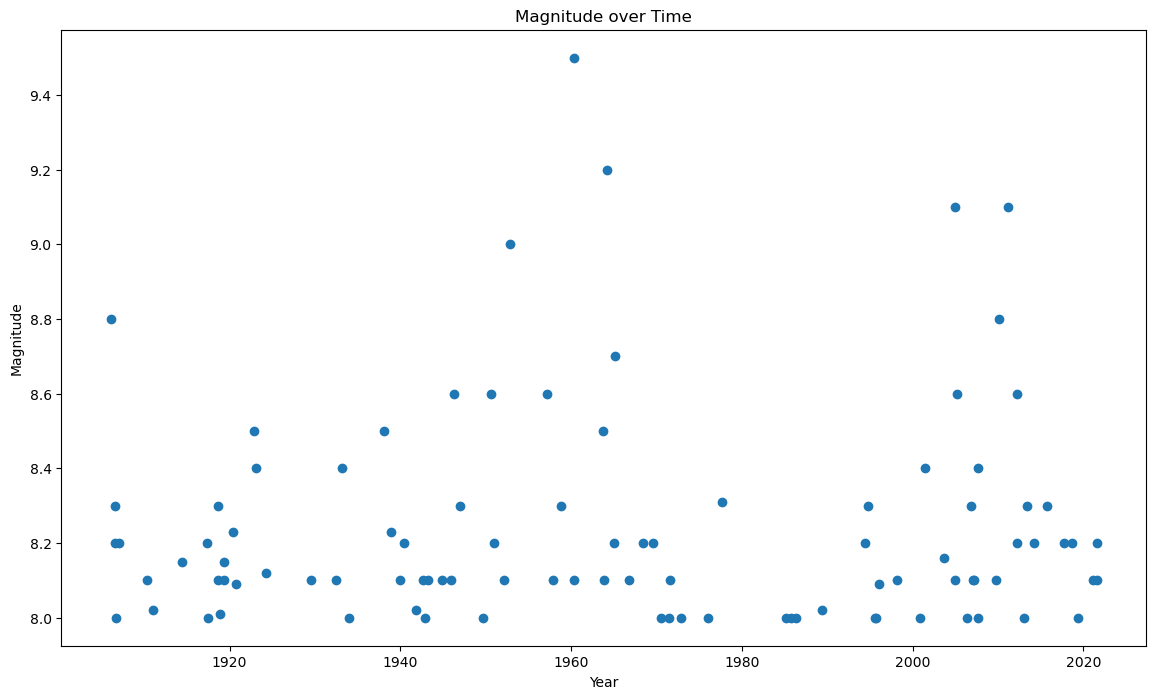

In [24]:
# lets plot

plt.figure(figsize=(14, 8))
plt.scatter(strong_earthequakes['time'], strong_earthequakes['mag'])
plt.title("Magnitude over Time")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.show()

In [25]:
df_size = len(df['time'])
df_size

strong_earthequakes_size = len(strong_earthequakes['time'])
strong_earthequakes_size

print('{} is the percentage of strong earthquakes to all earthquakes >4.5 magnitude'.format((strong_earthequakes_size / df_size) * 100))

0.03433142209952573 is the percentage of strong earthquakes to all earthquakes >4.5 magnitude


## Analysis Outcome:

### The fact that severe earthquakes aren't always related to a certain amount of time is one of the analysis's most intriguing findings. Strong earthquakes, which are very uncommon occurrences with a likelihood of occuring just 0.034 percent of the time in earthquakes that measure 4.5 or above, are difficult to identify any distinct patterns linked with. A noteworthy fact is that the bulk of the largest earthquakes are found close to convergent plate borders, suggesting that these areas are more vulnerable to seismic activity. 


### This dataset may be further analysed in a number of different ways. For instance, one may isolate the data for a particular area and determine the likelihood that a severe earthquake would occur there, offering important insights for risk management and disaster planning. Additionally, an interactive dashboard created with Tableau or a similar programme could show how uncommon these events are as well as how strong earthquakes tend to cluster near convergent plate boundaries. Our knowledge of earthquake behaviour might be substantially improved by combining this dataset with another one that has details about the type of plate boundary at a specific site.


## Segregating Columns for Prediction

In [26]:
df3 = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst', 'mag']]
df3.head()

,latitude,longitude,depth,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,mag
0,41.8050,79.8675,10.000,46.0,91.0,1.293,0.80,6.59,1.897,0.078,52.0,5.0
1,18.7420,145.4868,200.365,67.0,85.0,5.158,0.95,10.27,7.539,0.043,165.0,4.8
2,42.0857,79.9516,10.000,45.0,77.0,1.223,0.82,6.27,1.869,0.086,42.0,4.9
3,14.9364,-104.5563,10.000,51.0,217.0,5.661,0.57,11.79,1.984,0.038,205.0,4.6
4,44.6730,146.5159,134.299,108.0,62.0,2.866,0.82,8.66,5.863,0.059,84.0,4.5


### First Lets Train with the Linear Reg Model to see how its fit

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
# Feature selection
X = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']]
  # Input features
y = df['mag']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.1819515107749925


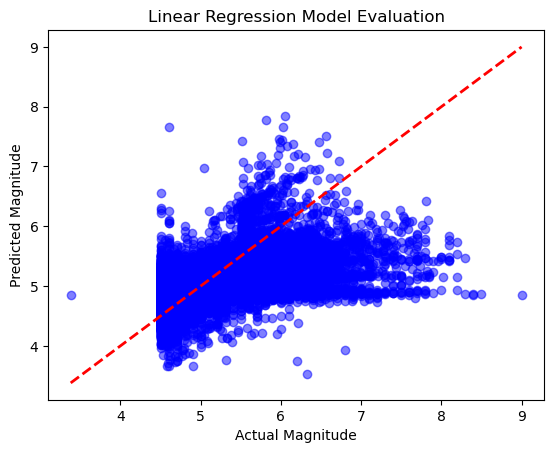

In [29]:
# Plotting the evaluation
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Linear Regression Model Evaluation')
plt.show()


## OLS Model

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

OLS Model: Mean Squared Error - 0.18293160904697905


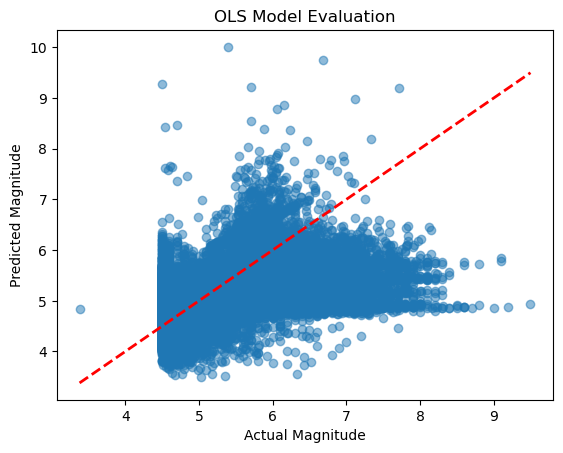

In [31]:
# Add a constant term to the input features
X = sm.add_constant(X)

# Define and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Make predictions
y_pred = results.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print(f"OLS Model: Mean Squared Error - {mse}")

# Plot the evaluation
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('OLS Model Evaluation')
plt.show()


# Training with more models

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

LinearRegression: Mean Squared Error - 0.18293160904697903


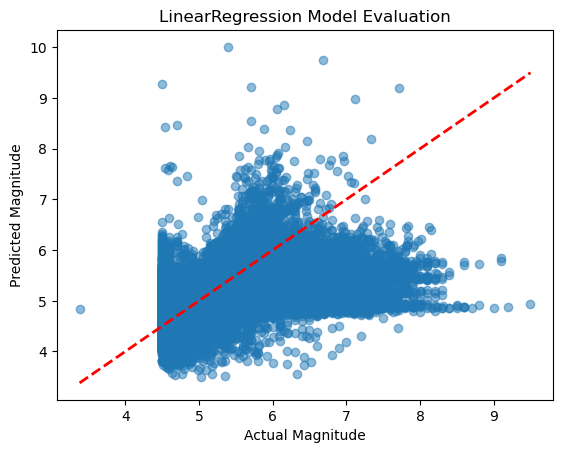

Ridge: Mean Squared Error - 0.18293163508631569


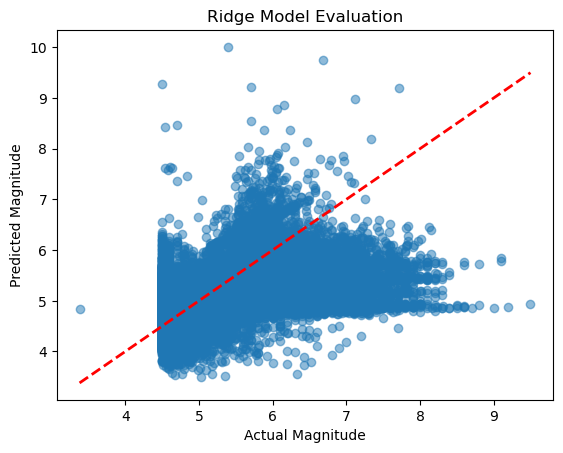

Lasso: Mean Squared Error - 0.2153805372522036


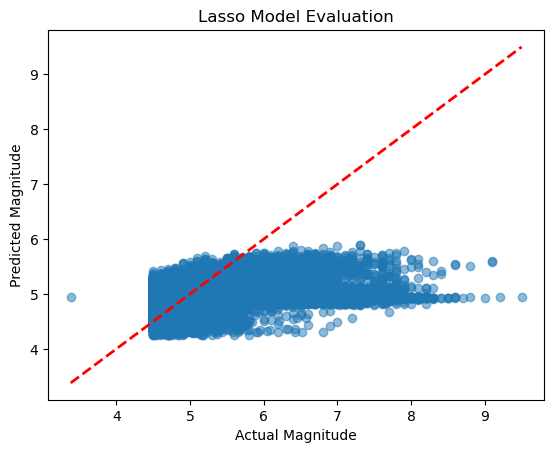

RandomForestRegressor: Mean Squared Error - 0.01061132657964303


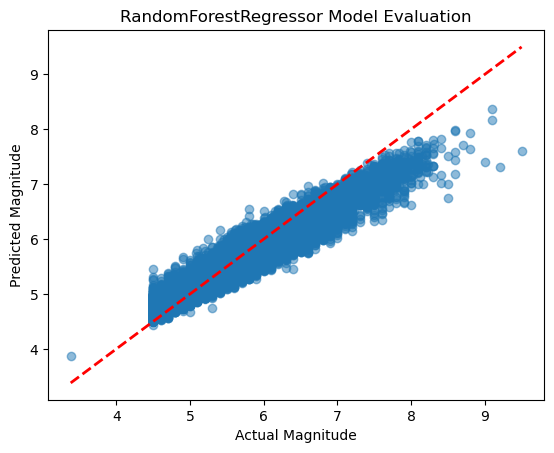

XGBRegressor: Mean Squared Error - 0.06989692899475461


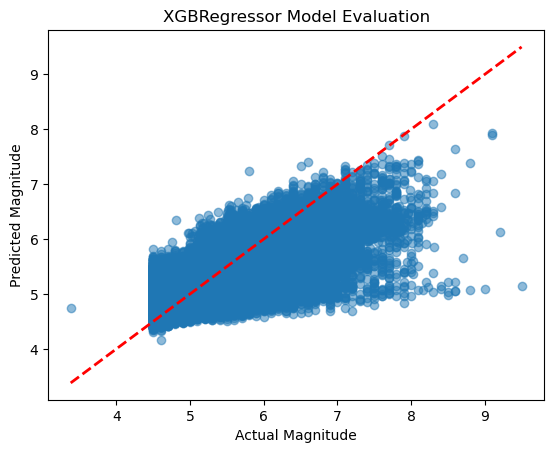

In [33]:
# %%time
# Define the regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    XGBRegressor()
]

# Train and evaluate the models
for model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"{model.__class__.__name__}: Mean Squared Error - {mse}")

    # Plot the evaluation
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2)
    plt.xlabel('Actual Magnitude')
    plt.ylabel('Predicted Magnitude')
    plt.title(f'{model.__class__.__name__} Model Evaluation')
    plt.show()


## From the Above Scores and charts we can see that RandomForrest converges and Fitted the Data Best.

## Above we got the Random Forest Model with the best Parameters.

In [40]:
# %%time
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto']
}

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
CPU times: total: 5min 19s
Wall time: 5min 38s


#### Testing the Model

In [41]:
# dict(X.loc[0])

In [42]:
data = {'const': [1.0],
 'latitude': [41.805],
 'longitude': [79.8675],
 'depth': [10.0],
 'nst': [46.0],
 'gap': [91.0],
 'dmin': [1.293],
 'rms':[0.8],
 'horizontalError': [6.59],
 'depthError': [1.897],
 'magError': [0.078],
 'magNst': [52.0]}

In [43]:
# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Define the custom data
custom_data = pd.DataFrame(data)

# Make predictions on the custom data using the best model
predictions = best_model.predict(custom_data)

# Print the predicted magnitude
print('Predicted Magnitude:', predictions[0])

Predicted Magnitude: 4.69693598387009


In [45]:
print("Actual Value:",y.loc[0])

Actual Value: 5.0
